In [1]:
import numpy as np 
import pandas as pd 

In [2]:
import warnings
warnings.filterwarnings("ignore")
import logging
logging.disable(logging.CRITICAL)

In [3]:
data1 = pd.read_csv("JKH 2022-2023.csv")
data1.head()




,Day,High,Low,Close,No. of Trades,No. of Shares,Turnover(Rs.)
0,2022-01-03,153.25,149.0,152.75,321,799594,121924661
1,2022-01-04,153.25,149.0,149.50,177,317312,47828320
2,2022-01-05,151.75,147.0,150.75,232,1557752,234256848
3,2022-01-06,152.00,148.5,151.00,189,318537,47954695
4,2022-01-07,158.25,150.0,155.50,627,3343693,512681469


In [4]:
#df = data1.iloc[:, :4].loc[2637:]
df = data1.iloc[:, :4]
df.head()


,Day,High,Low,Close
0,2022-01-03,153.25,149.0,152.75
1,2022-01-04,153.25,149.0,149.50
2,2022-01-05,151.75,147.0,150.75
3,2022-01-06,152.00,148.5,151.00
4,2022-01-07,158.25,150.0,155.50


In [5]:
# df['High'] = df['High'].astype(float)
# df['Low'] = df['Low'].astype(float)
# df['Closing'] = df['Closing'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Day     293 non-null    object 
 1   High    293 non-null    float64
 2   Low     293 non-null    float64
 3   Close   293 non-null    float64
dtypes: float64(3), object(1)
memory usage: 9.3+ KB


In [6]:
m = 0.80
df.columns

Index(['Day', 'High', 'Low', 'Close'], dtype='object')

In [7]:
df['First_Dif'] = df['Close'].diff(1)
df.head()

,Day,High,Low,Close,First_Dif
0,2022-01-03,153.25,149.0,152.75,NaN
1,2022-01-04,153.25,149.0,149.50,-3.25
2,2022-01-05,151.75,147.0,150.75,1.25
3,2022-01-06,152.00,148.5,151.00,0.25
4,2022-01-07,158.25,150.0,155.50,4.50


In [8]:
df = df.groupby('Day').sum()
df['Day'] = df.index
df = df[['Day','First_Dif']]

df['Day'] = pd.to_datetime(df['Day'],format = '%Y-%m-%d')
df.head()

,Day,First_Dif
Day,,
2022-01-03,2022-01-03,0.00
2022-01-04,2022-01-04,-3.25
2022-01-05,2022-01-05,1.25
2022-01-06,2022-01-06,0.25
2022-01-07,2022-01-07,4.50


In [9]:
data = df[['First_Dif']]
# Convert the dataframe to a numpy array
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * m ))
dataset

array([[  0.  ],
       [ -3.25],
       [  1.25],
       [  0.25],
       [  4.5 ],
       [  1.5 ],
       [  0.5 ],
       [ -0.5 ],
       [  6.25],
       [  0.5 ],
       [ -1.  ],
       [ -0.75],
       [ -1.  ],
       [  1.  ],
       [ -1.5 ],
       [ -0.25],
       [  0.5 ],
       [ -1.25],
       [  0.75],
       [ -0.25],
       [ -1.75],
       [ -0.25],
       [ -1.  ],
       [  0.  ],
       [ -1.75],
       [  1.25],
       [  0.5 ],
       [ -0.5 ],
       [  3.  ],
       [ -1.75],
       [ -2.5 ],
       [ -5.25],
       [  0.  ],
       [ -0.75],
       [ -4.25],
       [  2.  ],
       [  2.  ],
       [ -1.  ],
       [ -2.  ],
       [ -0.25],
       [ -1.25],
       [ -1.5 ],
       [ -1.75],
       [  8.25],
       [ -0.25],
       [ -1.  ],
       [ -2.25],
       [  5.75],
       [  4.75],
       [  0.5 ],
       [ -0.25],
       [  0.25],
       [ -0.25],
       [  0.25],
       [ -2.  ],
       [ -3.  ],
       [ -2.  ],
       [ -5.  ],
       [  4.  

In [10]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.5       ],
       [0.36458333],
       [0.55208333],
       [0.51041667],
       [0.6875    ],
       [0.5625    ],
       [0.52083333],
       [0.47916667],
       [0.76041667],
       [0.52083333],
       [0.45833333],
       [0.46875   ],
       [0.45833333],
       [0.54166667],
       [0.4375    ],
       [0.48958333],
       [0.52083333],
       [0.44791667],
       [0.53125   ],
       [0.48958333],
       [0.42708333],
       [0.48958333],
       [0.45833333],
       [0.5       ],
       [0.42708333],
       [0.55208333],
       [0.52083333],
       [0.47916667],
       [0.625     ],
       [0.42708333],
       [0.39583333],
       [0.28125   ],
       [0.5       ],
       [0.46875   ],
       [0.32291667],
       [0.58333333],
       [0.58333333],
       [0.45833333],
       [0.41666667],
       [0.48958333],
       [0.44791667],
       [0.4375    ],
       [0.42708333],
       [0.84375   ],
       [0.48958333],
       [0.45833333],
       [0.40625   ],
       [0.739

In [11]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []


# we use 60 days ahead for forecasting range
n=60
for i in range(n, len(train_data)):
    x_train.append(train_data[i-n:i, 0])
    y_train.append(train_data[i, 0])
    if i<= n:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.5       , 0.36458333, 0.55208333, 0.51041667, 0.6875    ,
       0.5625    , 0.52083333, 0.47916667, 0.76041667, 0.52083333,
       0.45833333, 0.46875   , 0.45833333, 0.54166667, 0.4375    ,
       0.48958333, 0.52083333, 0.44791667, 0.53125   , 0.48958333,
       0.42708333, 0.48958333, 0.45833333, 0.5       , 0.42708333,
       0.55208333, 0.52083333, 0.47916667, 0.625     , 0.42708333,
       0.39583333, 0.28125   , 0.5       , 0.46875   , 0.32291667,
       0.58333333, 0.58333333, 0.45833333, 0.41666667, 0.48958333,
       0.44791667, 0.4375    , 0.42708333, 0.84375   , 0.48958333,
       0.45833333, 0.40625   , 0.73958333, 0.69791667, 0.52083333,
       0.48958333, 0.51041667, 0.48958333, 0.51041667, 0.41666667,
       0.375     , 0.41666667, 0.29166667, 0.66666667, 0.20833333])]
[0.71875]



<AxesSubplot:xlabel='Day'>

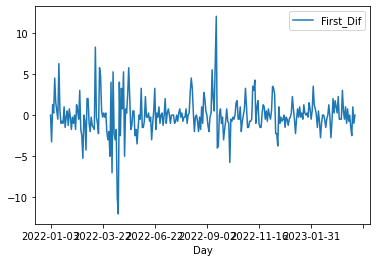

In [12]:
data.plot()

In [13]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

175/175 [==============================] - 8s 27ms/step - loss: 0.0191


In [14]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - n: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(n, len(test_data)):
    x_test.append(test_data[i-n:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print('rmse = ',rmse)


2/2 [==============================] - 1s 16ms/step
rmse =  1.2695810152401488


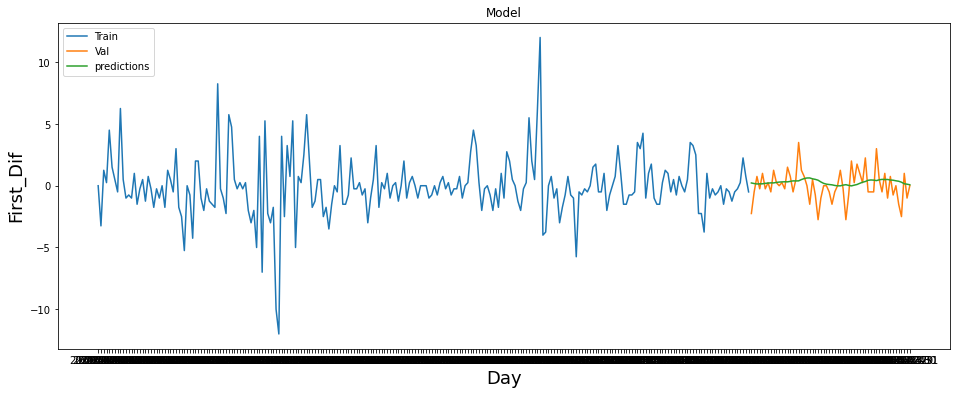

In [15]:
import matplotlib.pyplot as plt
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Day', fontsize=18)
plt.ylabel('First_Dif', fontsize=18)
plt.plot(train['First_Dif'])
plt.plot(valid[['First_Dif', 'predictions']])
plt.legend(['Train', 'Val', 'predictions'], loc='upper left')
plt.show()

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

# Calculate R-squared (R2) value
r2 = r2_score(y_test, predictions)

# Print the results
print('        mse                       r2             mape')
print(m,'  ',mse,'  ',r2,'  ',mape)


        mse                       r2             mape
0.8    1.6118359542582068    -0.06317963727933495    inf


In [17]:
#0.9    2.0385535604296066    -0.19753674622984296    inf

0.8    1.6118359542582068    -0.06317963727933495    inf